### Data Exploration and Analysis Notebook

In [62]:
# Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt
from IPython.display import display


In [ ]:
# Import dataset and print out basic data

df = pd.read_csv("..\\data\\unclean\\car_dataset.csv", delimiter = ";")

print(df.describe(include='all'))
print(f"\nTotal Rows: {len(df)}")
print(f"\n{df.head(7)}")

       buying maintenance doors persons luggage_boot safety class_values
count    1728        1728  1728    1728         1728   1728         1728
unique      4           4     4       3            3      3            4
top     vhigh       vhigh     2       2        small    low        unacc
freq      432         432   432     576          576    576         1210

Total Rows: 1728

  buying maintenance doors persons luggage_boot safety class_values
0  vhigh       vhigh     2       2        small    low        unacc
1  vhigh       vhigh     2       2        small    med        unacc
2  vhigh       vhigh     2       2        small   high        unacc
3  vhigh       vhigh     2       2          med    low        unacc
4  vhigh       vhigh     2       2          med    med        unacc
5  vhigh       vhigh     2       2          med   high        unacc
6  vhigh       vhigh     2       2          big    low        unacc


In [44]:
# Missing values
print("\nNumber of missing values in dataset:")
print(df.isnull().sum())

# Unique values in categorical columns
print("\nUnique values for distinct column:")
for col in ['buying', 'maintenance', 'doors', 'persons', 'luggage_boot', 'safety', 'class_values']:
    print(f"{col}: {df[col].unique()}")


Number of missing values in dataset:
buying          0
maintenance     0
doors           0
persons         0
luggage_boot    0
safety          0
class_values    0
dtype: int64

Unique values for distinct column:
buying: ['vhigh' 'high' 'med' 'low']
maintenance: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
luggage_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class_values: ['unacc' 'acc' 'vgood' 'good']


In [ ]:
# Print value counts for all columns

for column in df.columns:
    display(df[column].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maintenance
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

luggage_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64

class_values
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

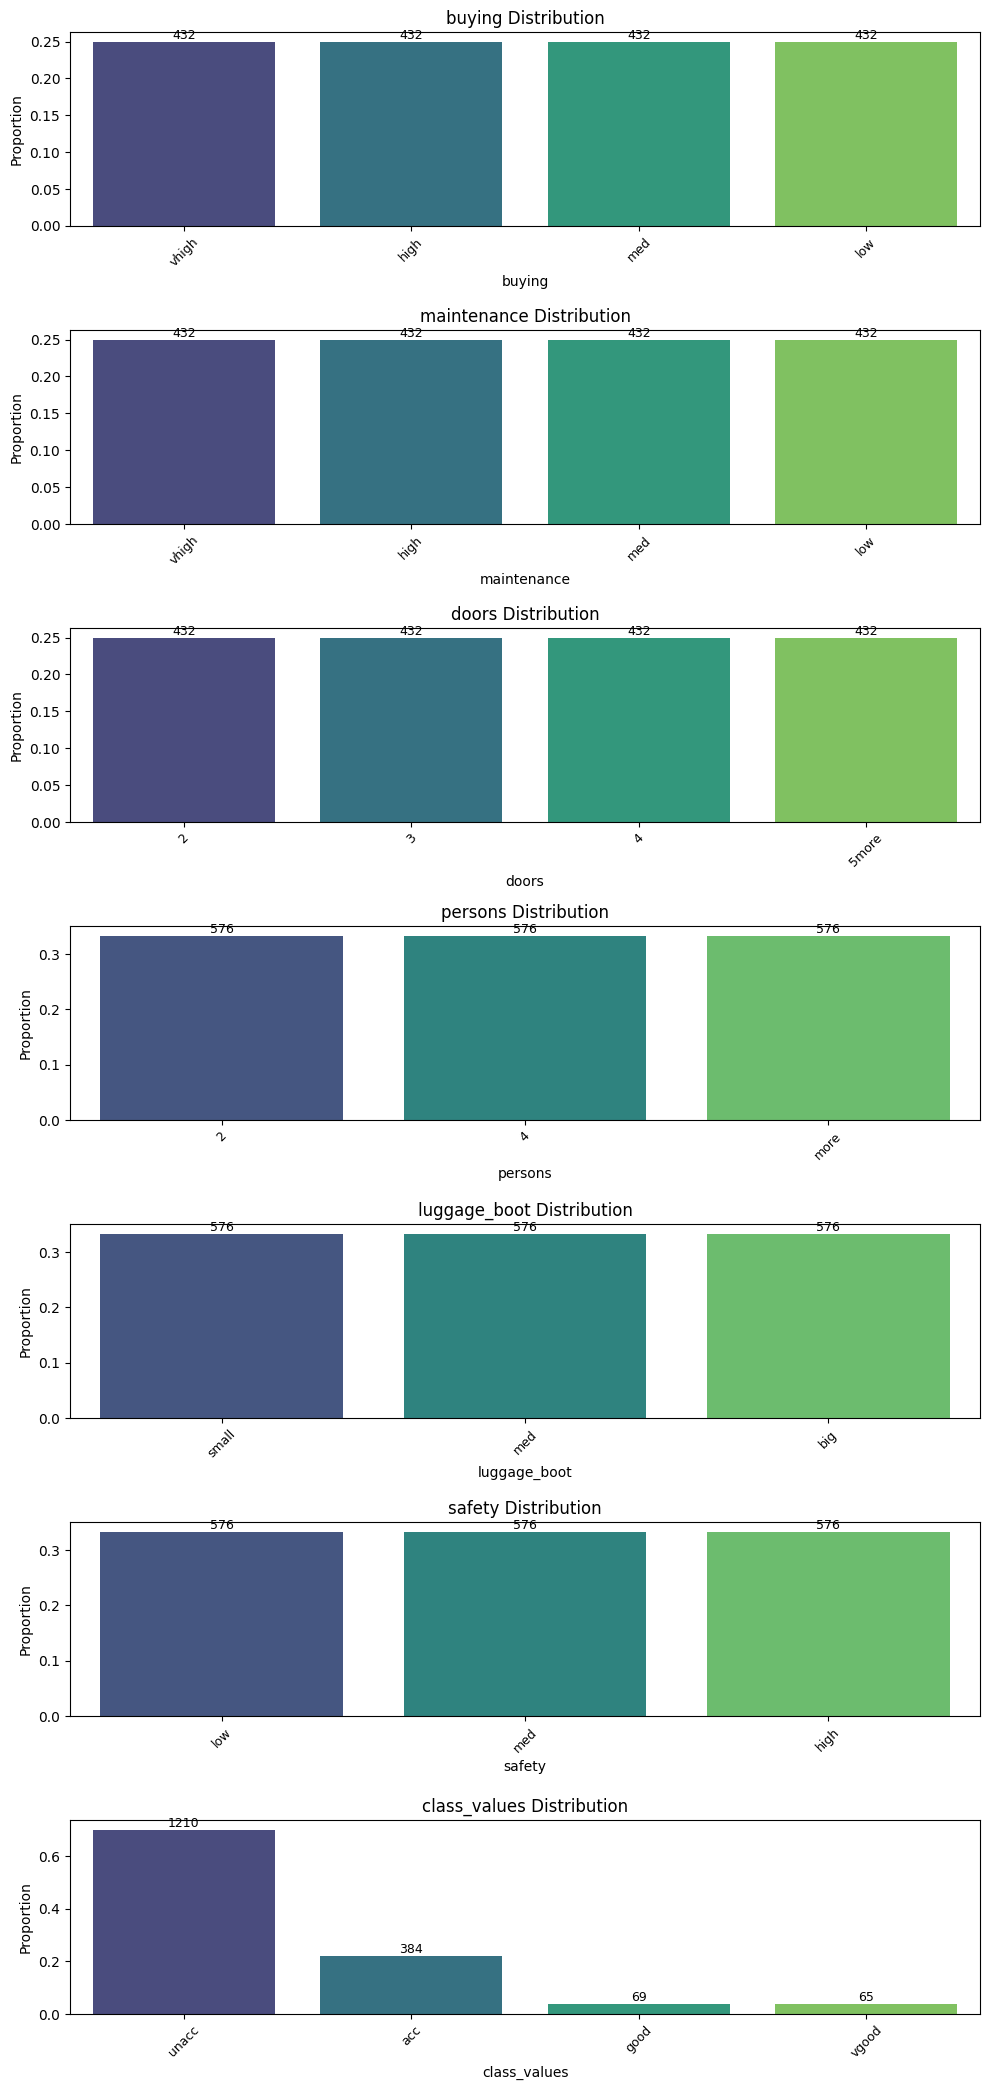

In [ ]:
categorical_columns = df.columns.tolist()
plt.figure(figsize=(10, len(categorical_columns) * 3))

for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    
    value_counts = df[col].value_counts(normalize=True)
    counts = df[col].value_counts()
    
    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        palette="viridis",
        hue=value_counts.index,
        dodge=False,
        legend=False,
    )
    
    for j, count in enumerate(counts):
        plt.text(j, value_counts.values[j], f'{count}', ha='center', va='bottom', fontsize=9)
    
    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Proportion', fontsize=10)
    plt.xticks(rotation=45, fontsize=9)

plt.tight_layout()
plt.show()